In [58]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import  train_test_split

from sklearn.preprocessing   import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import load_model

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [9]:
df = pd.read_csv('DATA/fake_reg.csv')

In [10]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


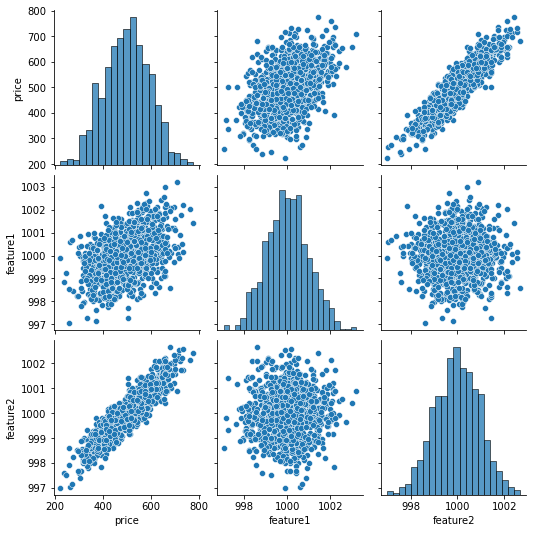

In [11]:
sns.pairplot(df)

In [12]:
X = df[['feature1','feature2']].values

In [13]:
y = df['price'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [15]:
X_train.shape

(700, 2)

In [16]:
X_test.shape

(300, 2)

In [17]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_train.max()

1.0

In [23]:
X_train.min()

0.0

In [24]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [25]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [26]:
model = Sequential([Dense(4,activation='relu'),
                    Dense(2,activation='relu'),
                    Dense(1)])

2022-04-10 16:30:38.695784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-10 16:30:38.695815: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-10 16:30:38.695841: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (filipe-pc): /proc/driver/nvidia/version does not exist
2022-04-10 16:30:38.696498: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [31]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256511.9531
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256175.4688
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255803.0156
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255380.1406
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 254898.7500
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 254361.5156
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 253764.8750
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 253117.2812
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 252410.7500
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 251631.1562
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 250784.4844
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 1635.2800
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 1591.3629
Epoch 99/250
22/22 [==============================] - 0s 991us/step - loss: 1543.9735
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 1503.3857
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 1456.7965
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 1420.3081
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 1373.4307
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1332.4673
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1289.1993
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 1246.7905
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1207.9138
Epoch 108/250
22/22 [==============================] - 0s 1ms/step - loss: 1168

22/22 [==============================] - 0s 1ms/step - loss: 24.7211
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 24.1923
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 24.8253
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 24.8543
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 24.6121
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 24.8599
Epoch 201/250
22/22 [==============================] - 0s 993us/step - loss: 24.2829
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 24.0968
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 23.9512
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 25.0029
Epoch 205/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5742
Epoch 206/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5194
Epoch 207/250
22

In [32]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

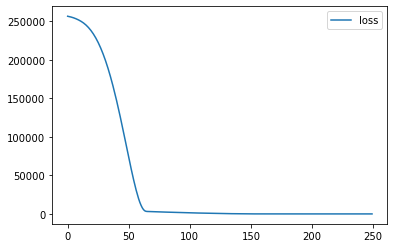

In [33]:
loss_df.plot()

In [34]:
model.evaluate(X_test,y_test,verbose=0)

27.68260383605957

In [35]:
model.evaluate(X_train,y_train,verbose=0)

25.1939640045166

In [38]:
test_predictions = model.predict(X_test)

In [39]:
test_predictions

array([[406.53665],
       [625.415  ],
       [593.9286 ],
       [573.92664],
       [367.70023],
       [580.91925],
       [516.5651 ],
       [460.53003],
       [550.88043],
       [448.913  ],
       [613.6286 ],
       [550.65784],
       [420.38275],
       [410.11496],
       [653.2512 ],
       [438.65314],
       [510.03937],
       [661.8675 ],
       [664.5524 ],
       [567.26666],
       [335.2434 ],
       [446.1916 ],
       [383.6883 ],
       [379.92798],
       [568.3031 ],
       [612.4033 ],
       [533.9962 ],
       [429.17728],
       [657.381  ],
       [415.37433],
       [444.0109 ],
       [486.60522],
       [439.7608 ],
       [683.86835],
       [426.09497],
       [418.94714],
       [503.5084 ],
       [552.14496],
       [511.24146],
       [396.52643],
       [620.4641 ],
       [417.9234 ],
       [606.2797 ],
       [447.3611 ],
       [503.51392],
       [583.5278 ],
       [671.0495 ],
       [491.91547],
       [319.6001 ],
       [486.90036],


In [40]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [41]:
test_predictions

0      406.536652
1      625.414978
2      593.928589
3      573.926636
4      367.700226
          ...    
295    530.625061
296    516.810425
297    611.492920
298    418.259979
299    412.118896
Length: 300, dtype: float32

In [42]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [43]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [44]:
pred_df.columns = ['Test True Y','Model Predictions']

In [45]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.536652
1,624.156198,625.414978
2,582.455066,593.928589
3,578.588606,573.926636
4,371.224104,367.700226
...,...,...
295,525.704657,530.625061
296,502.909473,516.810425
297,612.727910,611.492920
298,417.569725,418.259979


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

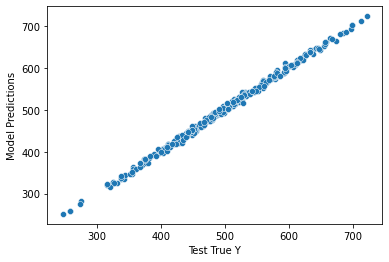

In [46]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [50]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.2712565410841545

In [51]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [52]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

27.68260625934273

In [53]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.261426257141948

In [54]:
new_gem = [[998,1000]]

In [55]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [56]:
new_gem = scaler.transform(new_gem)

In [57]:
model.predict(new_gem)

array([[420.92676]], dtype=float32)

In [59]:
model.save('my_gem_model.h5')

In [60]:
later_model = load_model('my_gem_model.h5')

In [61]:
later_model.predict(new_gem)

array([[420.92676]], dtype=float32)